In [3]:
from IPython.display import display, Math

display(Math(r"\vec{a} = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix}"))

<IPython.core.display.Math object>

# 3.1. Linear Regression

$\renewcommand{\mb}{\mathbf}$

## Regression

- Regression: predicting **numerical values**
  - Example: Predicting house prices based on features like area (square feet) and age (years)
  - Other examples: length of stays, demand (or retail sales), ...

- A **training dataset** contains **rows(=data point, example, sample)** with **labels(=target)** and **features=(variables, inputs, covariates)**.
    - target: house price
    - features: area, age

## Linear Regression

**Assumptions**
- Relationship between features $\mb{x}$ and target $y$ is approximately linear.
- Expected target value: $E[\mb{Y} | \mb{X} = \mb{x}]$ = linear function of $\mb{x}$
- Actual Target values = linear function + **gaussian** noise

**Notations**
- $n$: number of data points , $d$: feature dimension
- $\mb{x}^{(i)}=[x_1^{(i)}, x_2^{(i)}, x_3^{(i)}, ..., x_d^{(i)}]$, $i=1,...,n$
- $x_j^{(i)}$: $j$-th feature of $i$-th data point

## Model

A model describes how features can be transformed into an estimate of the target.
```
Features -> Model -> Target
```

**Simple linear model for house price**

> $price = w_{area} \cdot area + w_{age} \cdot age + b$

- $w_{area}$,$w_{age}$: weights
- $b$: bias

**Linear Model (General)**

> $\hat{y} = \omega_1 x_1 + \omega_2 x_2 + ... + \omega_d x_d + b$

- $\hat{y}$: estimated target
- $x_i$: $i$-th feature
- $\omega_i$: weight for $i$-th feature
- $b$: bias


## Linear Model

Comapctly, we can write it as a dot product:

> $\hat{y} = \mb{w}^T \mb{x} + b$

- $\mb{w}=[w_1,w_2,...,w_d]$: weight vector
- $\mb{x}=[x_1,x_2,...,x_d]$: feature vector
- $b$: bias

For the entire dataset, we can write it as a matrix equation:

> $\hat{\mb{y}} = \mb{X} \mb{w} + b$
- $\hat{\mb{y}}$: estimated target vector (n x 1)
- $\mb{X}$: feature matrix (n x d)
- $\mb{w}$: weight vector (d x 1)
- $b$: bias (scalar)

1. Even though we believe the underlying model is linear, the actual data is not perfectly linear because of noise.
2. $\mb{w}$ and b are called **model parameters**.

## Loss Function

Loss function measures the quality of the model, or how well the model fits the data.

**Fig. 3.1.1.** Fitting a linear regression model to one-dimensional data.
![alt text](https://d2l.ai/_images/fit-linreg.svg)

> $l^{(i)} = \frac{1}{2} (\hat{y}^{(i)} - y^{(i)})^2$

- $l^{(i)}$: loss for $i$-th data point
- $\hat{y}^{(i)}$: predicted target for $i$-th data point
- $y^{(i)}$: actual target for $i$-th data point

**Loss Function for the entire dataset**

$L(\mb{w},b) = \frac{1}{n} \sum_{i=1}^{n} l^{(i)}(\mb{w},b)=
\frac{1}{n} \sum_{i=1}^{n} \frac{1}{2} (\mb{w}^T \mb{x}^{(i)} + b - y^{(i)})^2$

**Training**: Find $\mb{w}$ and $b$ that minimize the loss function.

$\mb{w}^*, b^* = \argmin_{\mb{w},b} L(\mb{w},b)$


## Analytical Solution

Formally, we can find the optimal $\mb{w}$ and $b$ by solving the following equations:

$\partial_{\mb{w}} L(\mb{w},b) = 0$ and $\partial_{b} L(\mb{w},b

Let's incorporate the bias $b$ into the weight vector $\mb{w}$ by adding an extra feature $x_0=1$ to each data point.

$\mb{w} = [b, w_1, w_2, ..., w_d]$

Then, we can write the loss function as:

$L(\mb{w}) = \frac{1}{n} \sum_{i=1}^{n} \frac{1}{2} (\mb{w}^T \mb{x}^{(i)} - y^{(i)})^2$

In vector form:

$L(\mb{w}) = \frac{1}{2n} \|\mb{X} \mb{w} - \mb{y}\|^2$

$\partial_{\mb{w}} L(\mb{w}) = \frac{1}{n} \mb{X}^T (\mb{X} \mb{w} - \mb{y})=0$

Therefore, the optimal weight vector is:

$\mb{w}^* = (\mb{X}^T \mb{X})^{-1} \mb{X}^T \mb{y}$

and the optimal bias is:

$b^* = \frac{1}{n} \sum_{i=1}^{n} (y^{(i)} - \mb{w}^{*T} \mb{x}^{(i)})$

1. However, the analytical solution is not practical for large datasets because of the computational complexity of matrix inversion.
2. We will use **gradient descent** to find the optimal $\mb{w}$ and $b$.

## Gradient Descent

Gradient descent: iterative optimization algorithm for finding the minimum of a function.

1. Initialize the weight vector $\mb{w}$ and bias $b$.
2. Update the weight vector and bias by taking steps in the opposite direction of the gradient of the loss function w.r.t. the parameters. 
    1. $\mb{w} = \mb{w} - \eta \partial_{\mb{w}} L(\mb{w})$
    1. $b = b - \eta \partial_{b} L(\mb{w})$
    - $\eta$: learning rate
3. Repeat until convergence.

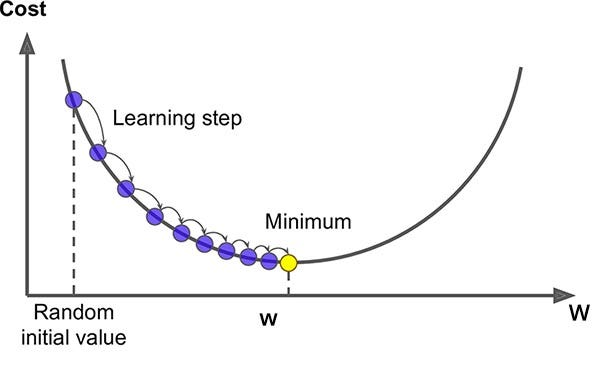

But, this is too slow for large datasets.

## Stochastic Gradient Descent

Stochastic gradient descent (SGD): randomly pick one data point at a time to compute the gradient.

1. Initialize the weight vector $\mb{w}$ and bias $b$.
2. Randomly pick a data point $(\mb{x}^{(i)}, y^{(i)})$.
3. Update the weight vector and bias:
   1. $\mb{w} = \mb{w} - \eta \partial_{\mb{w}} l^{(i)}(\mb{w})$
   2. $b = b - \eta \partial_{b} l^{(i)}(\mb{w})$
4. Repeat until convergence.

**Limitations**
- SGD is too sensitive to the learning rate
- SGD can get stuck in local minima
- Inefficient memory usage: Matrix–vector ops are faster than many vector–vector ops.

## Mini-batch Stochastic Gradient Descent

Mini-batch SGD: randomly pick a small set of data points to compute the gradient.

1. Initialize the weight vector $\mb{w}$ and bias $b$.
2. Randomly pick a mini-batch $\mathcal{B}$ of data points.
3. Update the weight vector and bias:

   $(\mb{w}, b) \leftarrow (\mb{w}, b) - \frac{\eta}{| \mathcal{B} |} \sum_{i\in \mathcal{B}} \partial_{(\mb{w},b)} l^{(i)}(\mb{w},b)$

4. Repeat until convergence.
 
**Benefits of mini-batch SGD**
- More stable convergence
- More efficient memory usage: Matrix-vector ops

**Hyperparameters**

Tunable parameters that are not learned during training:
- Learning rate $\eta$
- Mini-batch size $|\mathcal{B}|$

**After training**
- Evaluate the model using a **test dataset** (or validation dataset).
- **Caution:** Do not use the test dataset for training.
- Use the learned model to predict the target for new data points.

**Some important concepts**
- **Overfitting**: Model performs well on the training dataset but poorly on the test dataset.
- **Underfitting**: Model performs poorly on both the training and test datasets.
- **Generalization**: Model performs well on the test dataset.

## Vectorization
- Try to avoid explicit loops in Python.
- Use matrix operations in NumPy.
- Vectorization can significantly improve the performance of the code.

In [9]:
import torch
import time

In [18]:
# Explicit python loop
n = 10000
a = torch.ones(n)
b = torch.ones(n)
c = torch.zeros(n)
t = time.time()
for i in range(n):
    c[i] = a[i] + b[i]
dt_1 = time.time() - t
print(f'Explicit python loop: {dt_1} sec')

Explicit python loop: 0.03522992134094238 sec


In [19]:
# Vectorization
n = 10000
a = torch.ones(n)
b = torch.ones(n)
c = torch.zeros(n)

t = time.time()
c = a + b # pytorch will handle the vectorization
dt_2 = time.time() - t
print(f'Vectorization: {dt_2} sec')
print(f'Speedup: {dt_1/dt_2}x')

Vectorization: 0.00032019615173339844 sec
Speedup: 110.02606105733433x


## The Normal Distribution and Squared Loss

Motviation for squared loss is related to the normal distribution.

**Normal Distribution**

$p(x)=\frac{1}{\sqrt{2\pi}\sigma} \exp(-\frac{1}{2\sigma^2}(x-\mu)^2)$

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def normal(x, mu, sigma):
    p = 1 / np.sqrt(2 * np.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

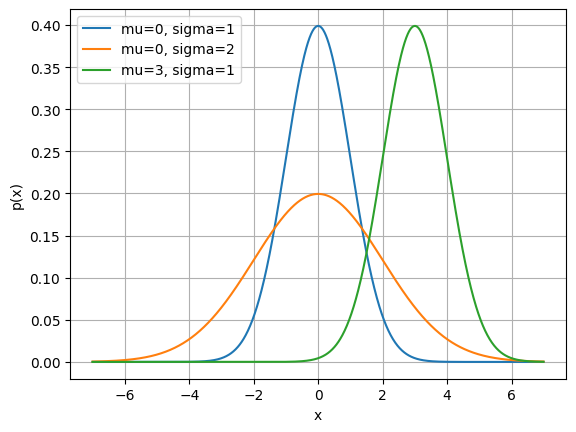

In [26]:
x = np.arange(-7,7,0.01)
params = [(0,1), (0,2), (3,1)]
for mu, sigma in params:
    plt.plot(x, normal(x, mu, sigma), label=f'mu={mu}, sigma={sigma}')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid()
plt.legend()
plt.show()

If we assume that the target is a linear function of the features plus gaussian noise:

$y = \mb{w}^T \mb{x} + b + \epsilon$ where $\epsilon \sim \mathcal{N}(0,\sigma^2)$

Then, the **likelihood** of observing $y$ given $\mb{x}$ is:

$P(y | \mb{x}) = \frac{1}{\sqrt{2\pi}\sigma} \exp\left(-\frac{1}{2\sigma^2}(y - \mb{w}^T \mb{x} - b\right)^2)$

For the entire dataset:

$P(\mb{y} | \mb{X}) = \prod_{i=1}^{n} P(y^{(i)} | \mb{x}^{(i)})$

**Maximum likelihood estimation (MLE)** is choosing $\mb{w}$ and $b$ that maximize the likelihood of the data:

$(\mb{w},b) = \argmax_{\mb{w},b} P(\mb{y} | \mb{X})$

**Log-likelihood**

$-\log P(\mb{y} | \mb{X}) = \sum_{i=1}^{n} \frac{1}{2} \log(2\pi\sigma^2) + \frac{1}{2\sigma^2} \sum_{i=1}^{n} (y^{(i)} - \mb{w}^T \mb{x}^{(i)} - b)^2$

Therefore, minimizing the squared loss is equivalent to maximizing the likelihood of the data under the assumption of gaussian noise.

## Linear Regression as a Neural Network

**Fig. 3.1.2** Linear regression as a single-layer neural network.
![alt text](https://d2l.ai/_images/singleneuron.svg)
